<h1><center>K-Means en Python paso a paso</center></h1>

---

<h3><center>Notebook Teérico-Práctico</center></h3>

---

En resumen... **K-Means es un algoritmo no supervisado de Clustering**. Se utiliza cuando tenemos un montón de datos sin etiquetar. 

El objetivo de este algoritmo es el de encontrar *K* grupos (clusters) entre los datos crudos. En esta notebook repasaremos sus conceptos básicos y veremos varios ejemplos paso a paso que podemos usar para practicar.

<h3><center>¿Cómo funciona K-Means?</center></h3>

---
El algoritmo trabaja iterativamente para asignar a cada *punto* (las filas de nuestro conjunto de entrada forman una coordenada) uno de los **K** grupos basado en sus características. Son agrupados con base a la similitud de sus features (columnas). Como resultado de ejecutar el algoritmo tendremos:

* Los **centroides** de cada grupo serán **coordenadas** de cada uno de los K conjuntos que se utilizarán para poder etiquetar nuevas muestras.
* Etiquetas para el conjunto de datos de entrenamiento. Cada etiqueta perteneciente a uno de los K grupos formados.

Los grupos se van definiendo de manera *orgánica*, es decir que se va ajustando su posición en cada iteración del proceso, hasta que converge el algoritmo. Una vez hallados los centroides deberemos analizarlos para ver cuales son sus características únicas, frente a la de los otros grupos. Estos grupos son las etiquetas que genera el algoritmo.

<h3><center>Casos de Uso de K-Means</center></h3>

---
El algoritmo de **Clustering K-means** es uno de los más usados para encontrar grupos ocultos, o sospechosos en teoría sobre un conjunto de datos no etiquetado. 

Esto puede servir para confirmar -o desterrar- alguna teoría que teníamos asumida de nuestros datos. Y también puede ayudarnos a descubrir relaciones asombrosas entre conjuntos de datos, que de manera manual, no hubiéramos reconocido. 

Una vez que el algoritmo ha ejecutado y obtenido las etiquetas, será fácil clasificar nuevos valores o muestras entre los grupos obtenidos.

Algunos casos de uso son:

* Segmentación por Comportamiento: relacionar el carrito de compras de un usuario, sus tiempos de acción e información del perfil.
* Categorización de Inventario: agrupar productos por actividad en sus ventas
* Detectar anomalías o actividades sospechosas: según el comportamiento en una web reconocer un troll -o un bot- de un usuario normal


<h3><center>Datos de Entrada para K-Means</center></h3>

---
Las *features* o características que utilizaremos como entradas para aplicar el algoritmo **k-means** deberán ser de valores numéricos, continuos en lo posible. 

En caso de valores categóricos (por ej. Hombre/Mujer o Ciencia Ficción, Terror, Novela,etc) se puede intentar pasarlo a valor numérico, pero no es recomendable pues no hay una *distancia rea*” -como en el caso de géneros de película o libros-. Además es recomendable que los valores utilizados estén normalizados, manteniendo una misma escala. En algunos casos también funcionan mejor datos porcentuales en lugar de absolutos. No conviene utilizar features que estén correlacionados o que sean escalares de otros.

----
----
----

<h2><center>Algoritmo K-means</center></h2>

---

El algoritmo utiliza una proceso iterativo en el que se van ajustando los grupos para producir el resultado final. Deberemos pasar como entrada el conjunto de datos y un valor de K. 

El conjunto de datos serán las características o features para cada punto. Las posiciones iniciales de los K centroides serán asignadas de manera aleatoria de cualquier punto del conjunto de datos de entrada. Luego se itera en dos pasos:

**1. Paso de Asignación de datos:**

En este paso, cada *fila* de nuestro conjunto de datos se asigna al centroide más cercano basado en la distancia cuadrada Euclideana. Se utiliza la siguiente fórmula (donde dist() es la distancia Euclideana standard):

<img src="https://i2.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/03/formula1-kmeans.png?w=826&ssl=1" weidth="300" align="center"/>

**2. Paso de actualización de Centroide**

En este paso los centroides de cada grupo son recalculados. Esto se hace tomando una media de todos los puntos asignados en el paso anterior.

<img src="https://i0.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/03/formula2-kmeans.png?w=830&ssl=1" weidth="300" align="center"/>


<h3><center>Elegir el valor de K</center></h3>

---

Este algoritmo funciona pre-seleccionando un valor de K. Para encontrar el número de clusters en los datos, deberemos ejecutar el algoritmo para un rango de valores K, ver los resultados y comparar características de los grupos obtenidos. En general no hay un modo exacto de determinar el valor K, pero se puede estimar con aceptable precisión siguiendo la siguiente técnica:

Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroid. Como el valor de la media diminuirá a medida que aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y encontrar el **codo**, donde la tasa de descenso se **afila**. Aquí vemos una gráfica a modo de ejemplo:

<img src="https://i2.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/03/ejemplo-elbow.png?resize=1024%2C562&ssl=1" weidth="200" align="center" />

<h3><center>Un ejemplo K-Means en Python con Sklearn</center></h3>

---

Como ejemplo utilizaremos de entradas un conjunto de datos en el que se analizaban rasgos de la personalidad de usuarios de Twitter. 

Unos pequeños filtros de 140 **famosos** del mundo en diferentes areas: deportistas, cantantes, actores, etc. Basado en una metodología de psicología conocida como **[Ocean: The Big Five](https://es.wikipedia.org/wiki/Modelo_de_los_cinco_grandes)** tendremos como características de entrada:


* usuario (el nombre en Twitter)

    * “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
    * “co” =Conscientiousness – grado de orden, prolijidad, organización
    * “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
    * “ag” = Agreeableness – grado de empatía con los demás, temperamento
    * “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
    * Wordcount – Cantidad promedio de palabras usadas en sus tweets
    * Categoria – Actividad laboral del usuario (actor, cantante, etc.)


Utilizaremos el algoritmo K-means para que agrupe estos usuarios -no por su actividad laboral- si no, por sus similitudes en la personalidad. Si bien tenemos 8 columnas de entrada, sólo utilizaremos 3 en este ejemplo, de modo que podamos ver en un gráfico tridimensional -y sus proyecciones a 2D- los grupos resultantes. Pero para casos reales, podemos utilizar todas las dimensiones que necesitemos. Una de las hipótesis que podríamos tener es: “Todos los cantantes tendrán personalidad parecida” (y así con cada rubro laboral). Pues veremos si lo probamos, o por el contrario, los grupos no están relacionados necesariamente con la actividad de estas Celebridades.

---

<h3><center>Agrupar usuarios Twitter de acuerdo a su personalidad con K-means</center></h3>
<h4><center>Implementando K-means en Python con Sklearn</center></h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [11]:
dataframe = pd.read_csv("analisis.csv")
dataframe.shape

(140, 8)

El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

    1. Actor/actriz
    2. Cantante
    3. Modelo
    4. Tv, series
    5. Radio
    6. Tecnología
    7. Deportes
    8. Politica
    9. Escritor

In [6]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [8]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning

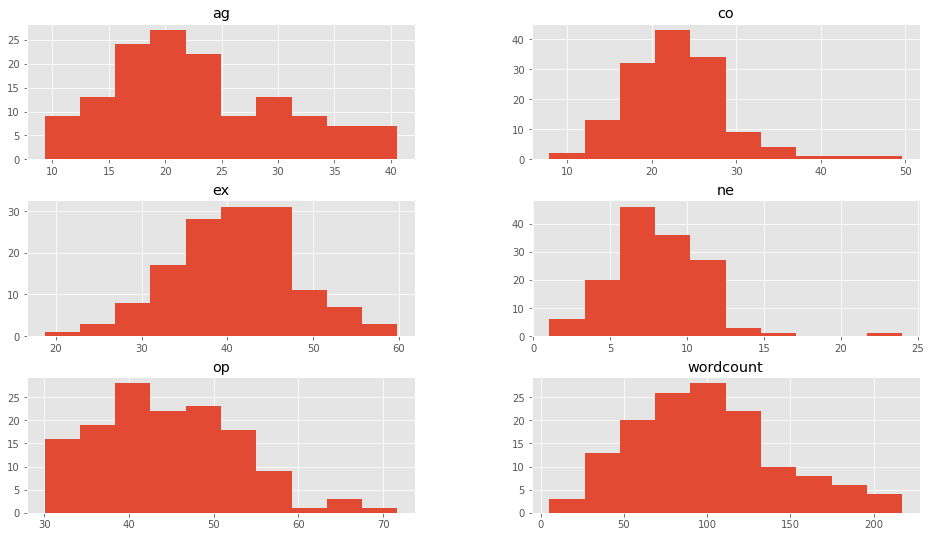

In [9]:
dataframe.drop(['categoria'],1).hist()
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


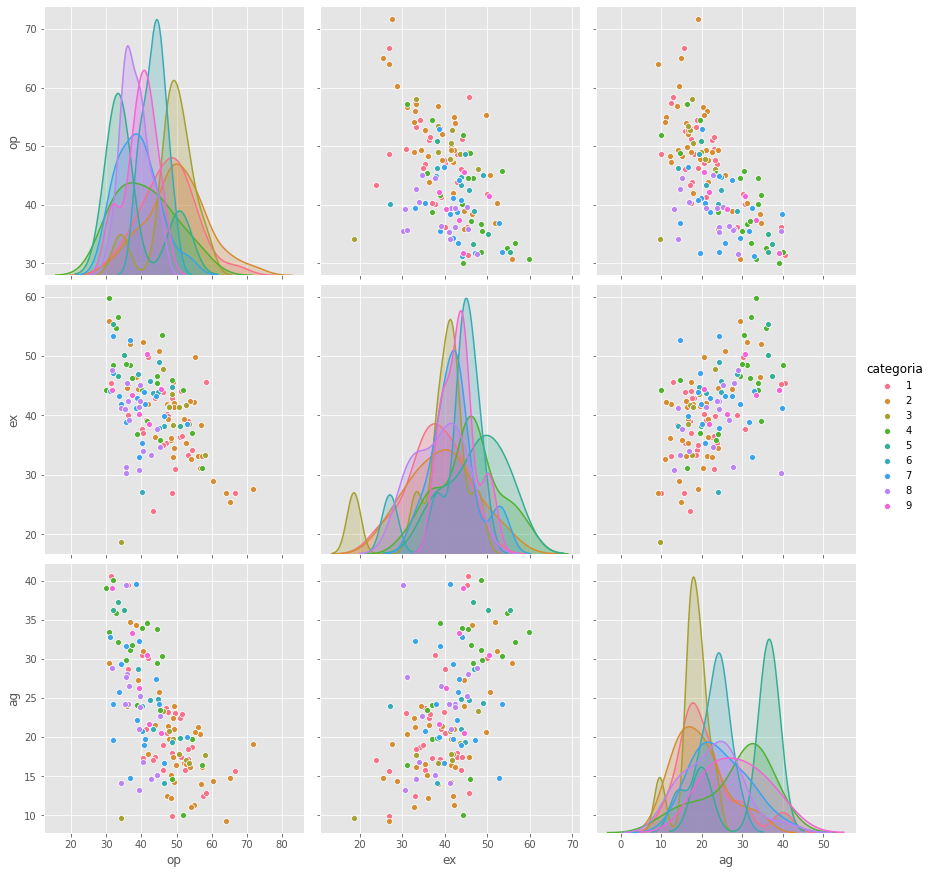

In [10]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [12]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

Ahora veremos una gráfica en 3D con 9 colores representando las categorías.

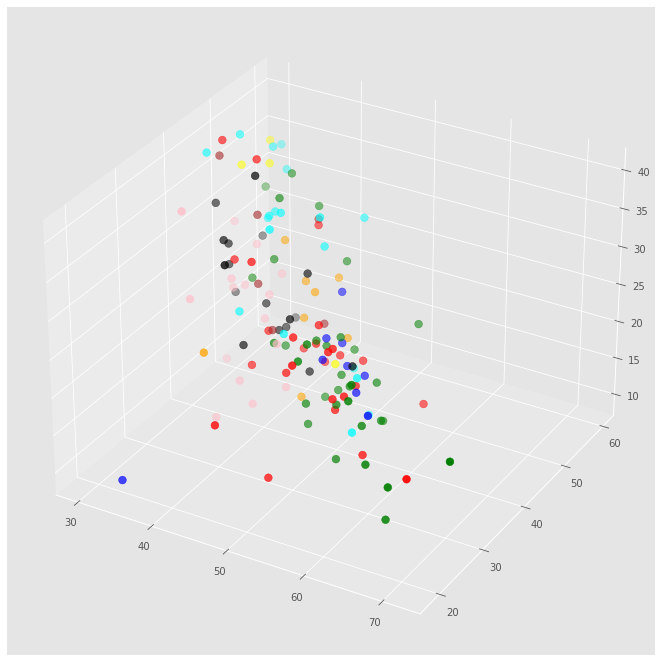

In [13]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

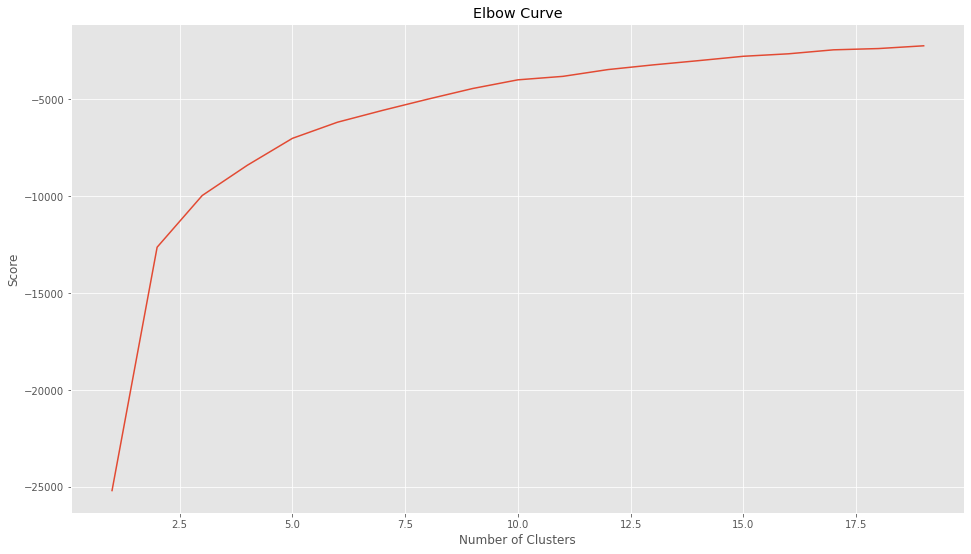

In [14]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. 5 podría ser un buen número para K. Según su criterio podría ser otro.

In [28]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[49.99285115 40.87133549 17.47411785]
 [35.90241306 47.56828232 33.58748762]
 [59.25320707 31.29770653 15.9896352 ]
 [43.3644665  31.89755772 19.50586767]
 [39.94672753 42.82349753 23.72594859]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

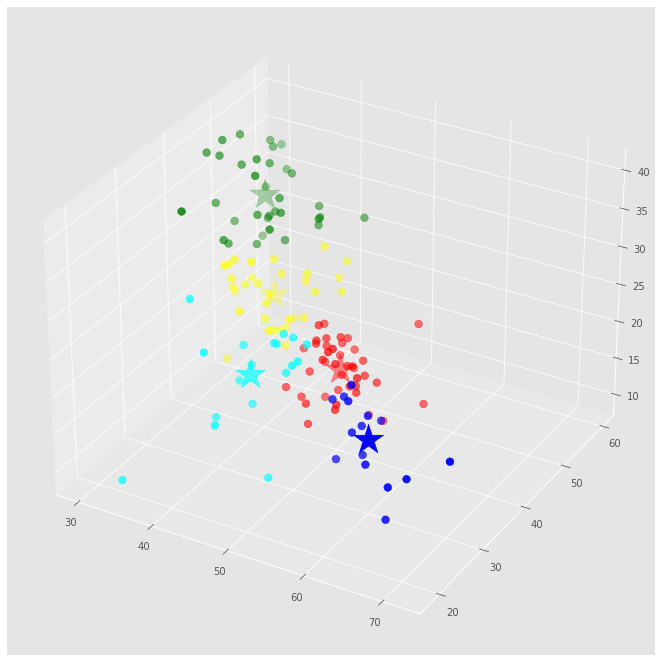

In [29]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

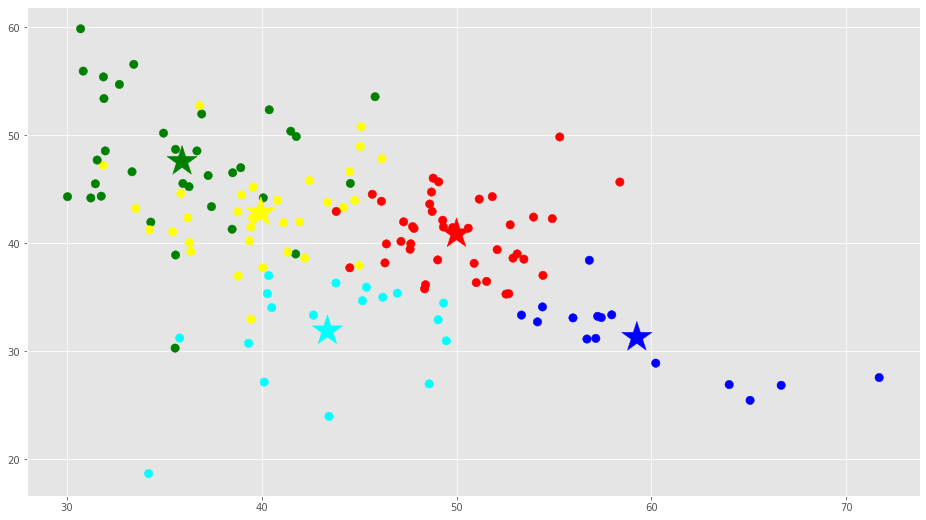

In [30]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

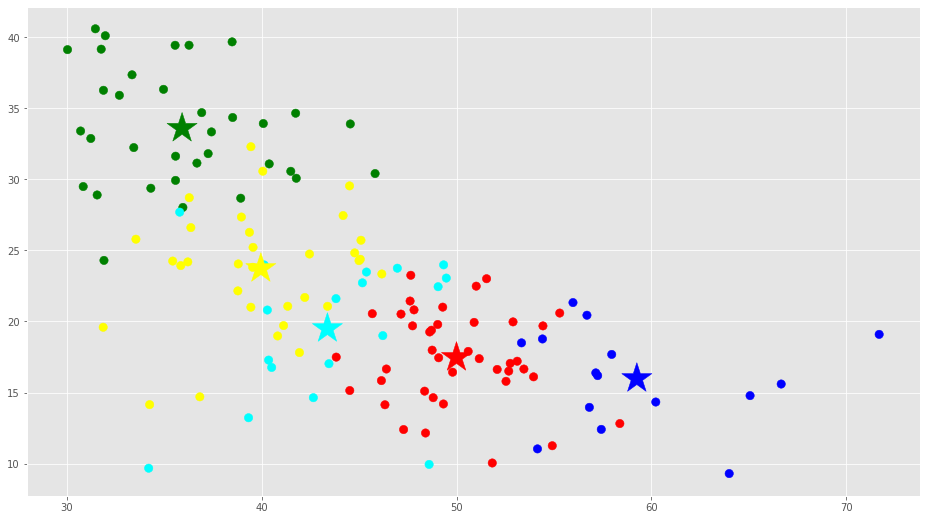

In [31]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

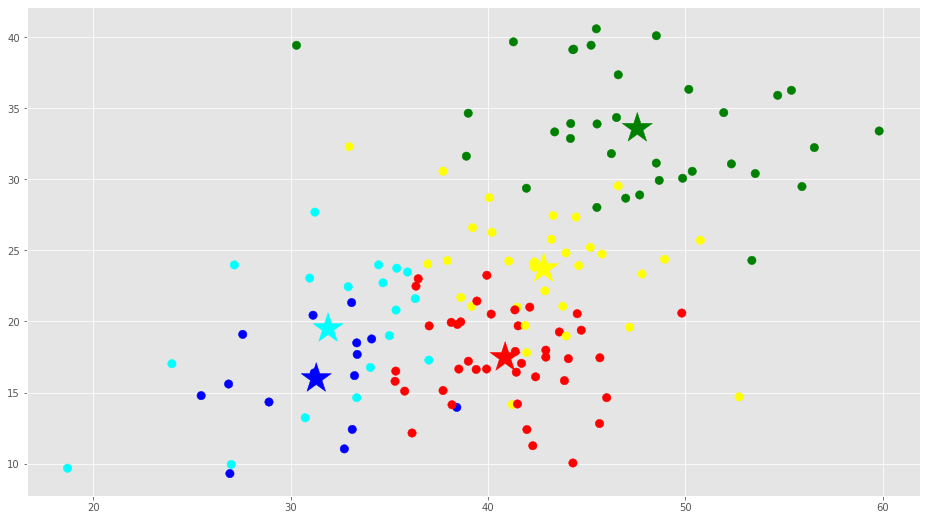

In [32]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [33]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,41
1,green,34
2,blue,15
3,cyan,18
4,yellow,32


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [34]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,11.0
2,2,14.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


De categoría 3 “modelos” hay 6 sobre un total de 9 (cuidado, en cada ejecución puede haber variaciones...)

Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [35]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21,  98,  82, 123,  64], dtype=int64)

In [36]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
maria_patino
JudgeJudy
SJP
ierrejon


<h3><center>Conclusiones</center></h3>

El algoritmo de K-means nos ayudará a crear clusters cuando tengamos grandes grupos de datos sin etiquetar, cuando queramos intentar descubrir nuevas relaciones entre features o para probar o declinar hipótesis que tengamos de nuestro negocio.

---

**Atención**: Puede haber casos en los que no existan grupos naturales, o clusters que contengan una verdadera razón de ser. Si bien K-means siempre nos brindará “k clusters”, quedará en nuestro criterio reconocer la utilidad de los mismos o bien revisar nuestras features y descartar las que no sirven o conseguir nuevas. 

También tener en cuenta que en este ejemplo estamos utilizando como medida de similitud entre features la distancia Euclideana pero podemos utilizar otras diversas funciones que podrían arrojar mejores resultados (como Manhattan, Mahalanobis, etc).